# Read dataset

In [81]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt

## Read dataset from directory
dir_data = './data/'
raw_data = os.path.join(dir_data, 'iris.data')
data = np.genfromtxt(raw_data, delimiter=",", dtype=str)
label = np.array(['sepal length in cm', 'sepal width in cm', 'petal length in cm', 'petal width in cm', 'class'])

# Put txt files into DataFrame

In [82]:
arrange_data = []
for line in data:
    arrange_data.append(line)

df = pd.DataFrame(arrange_data)
df.columns = label
df.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Split training data & testing data

In [83]:
iris_data = df[df.columns[:-1]]
iris_label = df['class']
train_data , test_data , train_label , test_label = train_test_split(iris_data, iris_label, test_size=0.33, stratify=iris_label)

# KNN (K = 5)

In [84]:
knn = KNeighborsClassifier(n_neighbors=5, p=1)
knn.fit(train_data,train_label)
pred = knn.predict(test_data)
accuracy = knn.score(test_data, test_label, sample_weight=None)

# Confusion matrix

In [85]:
print(confusion_matrix(test_label, pred))

[[17  0  0]
 [ 0 16  0]
 [ 0  1 16]]


# Prediction

In [86]:
print(classification_report(test_label, pred))
print("Accuracy: ", accuracy)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.94      1.00      0.97        16
 Iris-virginica       1.00      0.94      0.97        17

      micro avg       0.98      0.98      0.98        50
      macro avg       0.98      0.98      0.98        50
   weighted avg       0.98      0.98      0.98        50

Accuracy:  0.98


# Compare the accuracy with different values of K

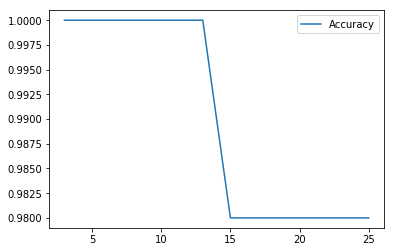

In [87]:
K_values = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]
K_accuracy = []
for value in K_values:
    knn = KNeighborsClassifier(n_neighbors=value)
    knn.fit(train_data,train_label)
    K_accuracy.append(knn.score(test_data, test_label, sample_weight=None))

plt.plot(K_values, K_accuracy, label="Accuracy")
plt.legend()
plt.show()